Question 1 (5 Marks)



Build a small CNN model consisting of 5 convolution layers. Each convolution layer would be followed by an activation and a max-pooling layer.

After 5 such conv-activation-maxpool blocks, you should have one dense layer followed by the output layer containing 10 neurons (1 for each of the 10 classes). The input layer should be compatible with the images in the iNaturalist dataset dataset.

## Data Preprocessing 

We are going to first split the inaturalist_12K dataset so we are going to split the training dataset into 80% as training and 20% and validation 

- Each Folder Contains in training consists of 10 Folder with 1000 images each 
- Training - 800 Images and Validation 200 Images
- I am saving training, validation and test in seperate folders

In [ ]:
import os
import shutil
import random
from tqdm import tqdm

def split_dataset(
    src_dir,
    dest_train_dir='train',
    dest_val_dir='val',
    train_ratio=0.8,
    seed=42
):
    random.seed(seed)

    # Create destination directories if they don't exist
    os.makedirs(dest_train_dir, exist_ok=True)
    os.makedirs(dest_val_dir, exist_ok=True)

    classes = os.listdir(src_dir)
    print(f"Found {len(classes)} class folders: {classes}")

    for cls in tqdm(classes, desc="Processing classes"):
        src_cls_path = os.path.join(src_dir, cls)
        if not os.path.isdir(src_cls_path):
            continue

        all_images = [img for img in os.listdir(src_cls_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random.shuffle(all_images)

        total_images = len(all_images)
        train_count = int(train_ratio * total_images)
        val_count = total_images - train_count
        print(train_count)
        print(val_count)

        train_images = all_images[:train_count]
        val_images = all_images[train_count:]

        train_cls_path = os.path.join(dest_train_dir, cls)
        val_cls_path = os.path.join(dest_val_dir, cls)

        os.makedirs(train_cls_path, exist_ok=True)
        os.makedirs(val_cls_path, exist_ok=True)

        for img in train_images:
            shutil.copy(os.path.join(src_cls_path, img), os.path.join(train_cls_path, img))

        for img in val_images:
            shutil.copy(os.path.join(src_cls_path, img), os.path.join(val_cls_path, img))

    print("Dataset is splitted into train of 80% and validation of 20%")

# Usage
split_dataset(src_dir="inaturalist_12K/train")

Found 11 class folders: ['.DS_Store', 'Aves', 'Insecta', 'Animalia', 'Mammalia', 'Plantae', 'Fungi', 'Amphibia', 'Arachnida', 'Mollusca', 'Reptilia']


Processing classes:   0%|          | 0/11 [00:00<?, ?it/s]

800
200


Processing classes:  18%|█▊        | 2/11 [00:01<00:06,  1.30it/s]

800
200


Processing classes:  27%|██▋       | 3/11 [00:03<00:08,  1.12s/it]

800
200


Processing classes:  36%|███▋      | 4/11 [00:05<00:10,  1.52s/it]

800
200


Processing classes:  45%|████▌     | 5/11 [00:07<00:09,  1.60s/it]

800
200


Processing classes:  55%|█████▍    | 6/11 [00:09<00:09,  1.88s/it]

799
200


Processing classes:  64%|██████▎   | 7/11 [00:11<00:07,  1.99s/it]

800
200


Processing classes:  73%|███████▎  | 8/11 [00:13<00:05,  1.97s/it]

800
200


Processing classes:  82%|████████▏ | 9/11 [00:15<00:03,  1.85s/it]

800
200


Processing classes:  91%|█████████ | 10/11 [00:17<00:01,  1.92s/it]

800
200


Processing classes: 100%|██████████| 11/11 [00:19<00:00,  1.76s/it]

Dataset is splitted into train of 80% and validation of 20%


Question 1 (5 Marks)
Build a small CNN model consisting of 5 convolution layers. Each convolution layer would be followed by an activation and a max-pooling layer.

After 5 such conv-activation-maxpool blocks, you should have one dense layer followed by the output layer containing 10 neurons (1 for each of the 10 classes). The input layer should be compatible with the images in the iNaturalist dataset dataset.

The code should be flexible such that the number of filters, size of filters, and activation function of the convolution layers and dense layers can be changed. You should also be able to change the number of neurons in the dense layer.

What is the total number of computations done by your network? (assume mmm filters in each layer of size k×kk\times kk×k and nnn neurons in the dense layer)
What is the total number of parameters in your network? (assume mmm filters in each layer of size k×kk\times kk×k and nnn neurons in the dense layer)

In [12]:
import torch
import torch.nn as nn
from torchinfo import summary

class SmallCNN(nn.Module):
    def __init__(self, config):
        super(SmallCNN, self).__init__()

        in_channels = 3  # RGB
        conv_layers = []

        for i in range(5):
            conv_layers.append(nn.Conv2d(
                in_channels=in_channels,
                out_channels=config['conv_filters'][i],
                kernel_size=config['kernel_sizes'][i],
                padding=1
            ))
            conv_layers.append(config['conv_activation']())
            conv_layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            in_channels = config['conv_filters'][i]

        self.conv_block = nn.Sequential(*conv_layers)

        dummy_input = torch.zeros(1, 3, *config['image_size'])
        dummy_output = self.conv_block(dummy_input)
        flat_size = dummy_output.view(1, -1).shape[1]

        self.fc1 = nn.Linear(flat_size, config['dense_neurons'])
        self.act_dense = config['dense_activation']()
        self.output = nn.Linear(config['dense_neurons'], config['num_classes'])

    def forward(self, x):
        x = self.conv_block(x)
        x = torch.flatten(x, 1)
        x = self.act_dense(self.fc1(x))
        return self.output(x)
    
config = {
    'conv_filters': [32, 64, 128, 256, 256],
    'kernel_sizes': [3, 3, 3, 3, 3],
    'conv_activation': nn.ReLU,
    'dense_activation': nn.ReLU,
    'dense_neurons': 512,
    'num_classes': 10,
    'image_size': (224, 224)
}

model = SmallCNN(config)
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
SmallCNN                                 [1, 10]                   --
├─Sequential: 1-1                        [1, 256, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 32, 224, 224]         896
│    └─ReLU: 2-2                         [1, 32, 224, 224]         --
│    └─MaxPool2d: 2-3                    [1, 32, 112, 112]         --
│    └─Conv2d: 2-4                       [1, 64, 112, 112]         18,496
│    └─ReLU: 2-5                         [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-6                    [1, 64, 56, 56]           --
│    └─Conv2d: 2-7                       [1, 128, 56, 56]          73,856
│    └─ReLU: 2-8                         [1, 128, 56, 56]          --
│    └─MaxPool2d: 2-9                    [1, 128, 28, 28]          --
│    └─Conv2d: 2-10                      [1, 256, 28, 28]          295,168
│    └─ReLU: 2-11                        [1, 256, 28, 28]          --
│

Layer 1: ConvBlock1 | In: 3 | Out: 32 | Kernel: 3 | Activation: ReLU | Pooling: MaxPool2d(2x2)

Layer 2: ConvBlock2 | In: 32 | Out: 64 | Kernel: 3 | Activation: ReLU | Pooling: MaxPool2d(2x2)

Layer 3: ConvBlock3 | In: 64 | Out: 128 | Kernel: 3 | Activation: ReLU | Pooling: MaxPool2d(2x2)

Layer 4: ConvBlock4 | In: 128 | Out: 256 | Kernel: 3 | Activation: ReLU | Pooling: MaxPool2d(2x2)

Layer 5: ConvBlock5 | In: 256 | Out: 256 | Kernel: 3 | Activation: ReLU | Pooling: MaxPool2d(2x2)

Dense Layer: 512 neurons | Activation: ReLU

Output Layer: 10 neurons for 10 classes


## Training and Prediction

Here I have wrote the code for training and prediction

- Using Adam as optimizer
- Using Cross Entropy Loss

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

class TrainAndPredict:
    def __init__(self, model, device, class_names, lr=0.001):
        self.model = model.to(device)
        self.device = device
        self.class_names = class_names
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)

    def train(self, train_loader, val_loader, epochs=10):
        for epoch in range(epochs):
            self.model.train()
            total_loss = 0

            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()

            val_acc = self.validate(val_loader)
            print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Val Acc: {val_acc:.2f}%")

    def validate(self, val_loader):
        self.model.eval()
        correct, total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        return 100 * correct / total

    def predict(self, image_tensor):
        self.model.eval()
        image_tensor = image_tensor.to(self.device).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            outputs = self.model(image_tensor)
            _, pred = torch.max(outputs, 1)
        
        return self.class_names[pred.item()]


## Training with Base model

- Running the model with Guess Config Parameters here 
- Got base Accuracy but this does not perform well in test dataset



In [14]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader


# Configuration
config = {
    'conv_filters': [32, 64, 128, 256, 256],
    'kernel_sizes': [3, 3, 3, 3, 3],
    'conv_activation': nn.ReLU,
    'dense_activation': nn.ReLU,
    'dense_neurons': 512,
    'num_classes': 10,
    'image_size': (224, 224)
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data
transform = transforms.Compose([
    transforms.Resize(config['image_size']),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder('train', transform=transform)
val_dataset = datasets.ImageFolder('val', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Initialize
model = SmallCNN(config)
trainer = TrainAndPredict(model, device, train_dataset.classes)

# Train
trainer.train(train_loader, val_loader, epochs=10)


Epoch 1/10 | Loss: 293.8244 | Val Acc: 15.48%
Epoch 2/10 | Loss: 286.1400 | Val Acc: 20.59%
Epoch 3/10 | Loss: 275.8431 | Val Acc: 23.78%
Epoch 4/10 | Loss: 265.9659 | Val Acc: 27.30%
Epoch 5/10 | Loss: 252.5008 | Val Acc: 30.25%
Epoch 6/10 | Loss: 241.8466 | Val Acc: 30.35%
Epoch 7/10 | Loss: 233.7809 | Val Acc: 33.44%
Epoch 8/10 | Loss: 225.2472 | Val Acc: 35.98%
Epoch 9/10 | Loss: 218.3937 | Val Acc: 37.24%
Epoch 10/10 | Loss: 201.1552 | Val Acc: 37.05%


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import wandb
import torch
import torch.nn as nn
import torch.optim as optim



activations = {
    'relu': nn.ReLU(),
    'tanh': nn.Tanh(),
    'sigmoid': nn.Sigmoid(),
    'leaky_relu': nn.LeakyReLU(),
    'mish':nn.Mish(),
    'gelu':nn.GELU(),
    'silu':nn.SiLU(),
    'relu6':nn.ReLU6()
}

optimizer_dict = {
    'adam': optim.Adam,
    'adamw': optim.AdamW,
    'sgd': optim.SGD
}


def generate_filters(base_m, strategy):
            if strategy == 'same':
                return [base_m] * 5
            elif strategy == 'double':
                return [base_m * (2 ** i) for i in range(5)]
            elif strategy == 'half':
                return [max(1, base_m // (2 ** i)) for i in range(5)]
            else:
                raise ValueError(f"Unknown strategy: {strategy}")

class CNN(nn.Module):
    def __init__(self, config):
        super(CNN, self).__init__()
        
        in_channels = config['input_dimension'][0]
        base_m = config['conv_filters']
        strategy = config['filter_org']
        conv_filters = generate_filters(base_m, strategy)
        kernel_sizes = config['kernel_sizes']
        stride = config['stride']
        padding = config['padding']
        pool = config['max_pooling_size']
        dropout = config['dropout_rate']
        use_bn = config['use_batchnorm']
        dropout_org = config['dropout_organisation']

        conv_layers = []
        for i in range(5):  # 5 conv layers
            out_channels = conv_filters[i]
            conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=kernel_sizes[i], stride=stride, padding=padding))
            if use_bn:
                conv_layers.append(nn.BatchNorm2d(out_channels))
            if dropout_org == 'before_relu':
                conv_layers.append(nn.Dropout2d(dropout))
            conv_layers.append(activations[config['conv_activation']])
            if dropout_org == 'after_relu':
                conv_layers.append(nn.Dropout2d(dropout))
            conv_layers.append(nn.MaxPool2d(kernel_size=pool))
            in_channels = out_channels

        self.conv = nn.Sequential(*conv_layers)

        # Estimate flattened size
        with torch.no_grad():
            dummy_input = torch.zeros((1, *config['input_dimension']))
            dummy_output = self.conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).shape[1]

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(flattened_size, config['dense_neurons']),
            activations[config['dense_activation']],
            nn.Dropout(dropout),
            nn.Linear(config['dense_neurons'], config['num_classes'])
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


class TrainAndPredict:
    def __init__(self, model, device, class_names, optimizer=None, lr=0.001, weight_decay=0.0):
        self.model = model.to(device)
        self.device = device
        self.class_names = class_names
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optimizer_dict[optimizer](self.model.parameters(), lr=lr, weight_decay=weight_decay)

    def train(self, train_loader, val_loader, epochs=10, save_path='best_model.pth'):
        best_val_acc = 0.0
        best_epoch = 0

        for epoch in range(epochs):
            self.model.train()
            total_loss = 0
            correct, total = 0, 0

            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

            train_loss = total_loss / len(train_loader)
            train_acc = 100 * correct / total
            val_acc = self.validate(val_loader)

            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")


            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_epoch = epoch + 1
                torch.save(self.model.state_dict(), save_path)

                artifact = wandb.Artifact('best-model', type='model')
                artifact.add_file(save_path)
                wandb.log_artifact(artifact)

            # Log to Weights & Biases
            wandb.log({
                'epoch': epoch + 1,
                'train_loss': train_loss,
                'train_acc': train_acc,
                'val_acc': val_acc
            })

        print(f"\nBest model saved from Epoch {best_epoch} with Val Acc: {best_val_acc:.2f}%")

    def validate(self, val_loader):
        self.model.eval()
        correct, total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        return 100 * correct / total

    def predict(self, image_tensor):
        self.model.eval()
        image_tensor = image_tensor.to(self.device).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            outputs = self.model(image_tensor)
            _, pred = torch.max(outputs, 1)
        
        return self.class_names[pred.item()]



def train_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config
        # print(config.conv_filters)
        wandb.run.name = f"filter_{config.filter_size}/dn_{config.n_neurons}/opt_{config.optimizer}/aug_{config.use_augmentation}"

        # Build dynamic config from sweep values
        dynamic_config = {
            'input_dimension': (3, 224, 224),
            'conv_filters': config.conv_filters,
            'kernel_sizes': [config.filter_size] * 5,
            'stride': config.stride,
            'filter_org': config.filter_org,
            'padding': config.padding,
            'max_pooling_size': config.max_pooling_size,
            'dropout_rate': config.dropout_rate,
            'use_batchnorm': config.use_batchnorm,
            'factor': config.factor,
            'dropout_organisation': 'after_relu',
            'dense_neurons': config.n_neurons,
            'num_classes': config.n_classes,
            'optimizer': config.optimizer,
            'conv_activation': config.conv_activation,
            'dense_activation': config.dense_activation,
            'image_size': (224, 224),
            
        }
        
        if config['filter_org'] == 'half' and config['conv_filters'] < 32:
            print("Skipping config: unsafe filter_org with too few filters")
            return
        if config['stride'] > 1 and config['max_pooling_size'] > 1 and config['filter_size'] >= 7:
            print("Skipping config: stride/pool too aggressive with large filter")
            return

        # Define your model
        model = CNN(dynamic_config)

        # Dataloaders
        train_transform = transforms.Compose([
            transforms.RandomResizedCrop(dynamic_config['image_size'], scale=(0.5, 1.0)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
            transforms.RandomGrayscale(p=0.1),
            transforms.GaussianBlur(kernel_size=3),
            transforms.ToTensor(),
        ]) if config.use_augmentation else transforms.Compose([
            transforms.Resize(dynamic_config['image_size']),
            transforms.ToTensor(),
        ])

        val_transform = transforms.Compose([
            transforms.Resize(dynamic_config['image_size']),
            transforms.ToTensor(),
        ])
        
        
        

        device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
        torch.cuda.set_device(device)
        train_dataset = datasets.ImageFolder('train', transform=train_transform)
        val_dataset = datasets.ImageFolder('val', transform=val_transform)
        train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True,num_workers=4, pin_memory=True)
        val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=True,num_workers=4, pin_memory=True)

        trainer = TrainAndPredict(model, device, train_dataset.classes,optimizer=config.optimizer,lr=config.learning_rate)

        # Train and log
        trainer.train(train_loader, val_loader, epochs=config.epochs)
        

sweep_config = {
    'method': 'bayes',
    'name': 'Custom CNN',
    'metric': {'name': "val_accuracy", 'goal': 'maximize'},
    'parameters': {
        'conv_filters': {'values': [32, 64, 128]},
        'filter_org': {
            'values': ['same', 'double', 'half']
        },
        'filter_size': {'values': [1,3,7,11]},
        'stride': {'values': [1,2]},
        'padding': {'values': [1,2]},
        'max_pooling_size': {'value': 2},
        'n_neurons': {'values': [64, 128, 256, 512, 1024]},
        'n_classes': {'value': 10},
        'conv_activation': {
            'values': ['relu', 'gelu', 'silu', 'mish', 'relu6','leaky_relu']
        },
        'dense_activation': {
            'values': ['relu', 'gelu', 'silu', 'mish', 'relu6','leaky_relu']
        },
        'dropout_rate': {'values': [0.2, 0.3, 0.4, 0.5]},
        'use_batchnorm': {'values': [True, False]},
        'factor': {'values': [0.5, 1, 2, 3]},
        'learning_rate': {'values': [0.001,0.0001]},
        'batch_size': {'values': [16,32,64]},
        'optimizer': {'values': ['adam', 'adamw','sgd']},
        'epochs': {'values': [5,10,15]},
        'use_augmentation': {'values': [True, False]},
        'dropout_organisation': {'values': ['after_relu','before_relu']},  # simplified for now
    },
}

sweep_id = wandb.sweep(sweep_config, project="iNaturalist_CNN")
wandb.agent(sweep_id, function=train_sweep, count=10)


### 

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import wandb
import torch
import torch.nn as nn
import torch.optim as optim



activations = {
    'relu': nn.ReLU(),
    'tanh': nn.Tanh(),
    'sigmoid': nn.Sigmoid(),
    'leaky_relu': nn.LeakyReLU(),
    'mish':nn.Mish(),
    'gelu':nn.GELU(),
    'silu':nn.SiLU(),
    'relu6':nn.ReLU6()
}

optimizer_dict = {
    'adam': optim.Adam,
    'adamw': optim.AdamW,
    'sgd': optim.SGD
}


def generate_filters(base_m, strategy):
            if strategy == 'same':
                return [base_m] * 5
            elif strategy == 'double':
                return [base_m * (2 ** i) for i in range(5)]
            elif strategy == 'half':
                return [max(1, base_m // (2 ** i)) for i in range(5)]
            else:
                raise ValueError(f"Unknown strategy: {strategy}")

class CNN(nn.Module):
    def __init__(self, config):
        super(CNN, self).__init__()
        
        in_channels = config['input_dimension'][0]
        base_m = config['conv_filters']
        strategy = config['filter_org']
        conv_filters = generate_filters(base_m, strategy)
        kernel_sizes = config['kernel_sizes']
        stride = config['stride']
        padding = config['padding']
        pool = config['max_pooling_size']
        dropout = config['dropout_rate']
        use_bn = config['use_batchnorm']
        dropout_org = config['dropout_organisation']

        conv_layers = []
        for i in range(5):  # 5 conv layers
            out_channels = conv_filters[i]
            conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=kernel_sizes[i], stride=stride, padding=padding))
            if use_bn:
                conv_layers.append(nn.BatchNorm2d(out_channels))
            if dropout_org == 'before_relu':
                conv_layers.append(nn.Dropout2d(dropout))
            conv_layers.append(activations[config['conv_activation']])
            if dropout_org == 'after_relu':
                conv_layers.append(nn.Dropout2d(dropout))
            conv_layers.append(nn.MaxPool2d(kernel_size=pool))
            in_channels = out_channels

        self.conv = nn.Sequential(*conv_layers)

        # Estimate flattened size
        with torch.no_grad():
            dummy_input = torch.zeros((1, *config['input_dimension']))
            dummy_output = self.conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).shape[1]

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(flattened_size, config['dense_neurons']),
            activations[config['dense_activation']],
            nn.Dropout(dropout),
            nn.Linear(config['dense_neurons'], config['num_classes'])
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


class TrainAndPredict:
    def __init__(self, model, device, class_names, optimizer=None, lr=0.001, weight_decay=0.0):
        self.model = model.to(device)
        self.device = device
        self.class_names = class_names
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optimizer_dict[optimizer](self.model.parameters(), lr=lr, weight_decay=weight_decay)

    def train(self, train_loader, val_loader, epochs=10, save_path='best_model.pth'):
        best_val_acc = 0.0
        best_epoch = 0

        for epoch in range(epochs):
            self.model.train()
            total_loss = 0
            correct, total = 0, 0

            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

            train_loss = total_loss / len(train_loader)
            train_acc = 100 * correct / total
            val_acc = self.validate(val_loader)

            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")


            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_epoch = epoch + 1
                torch.save(self.model.state_dict(), save_path)

                artifact = wandb.Artifact('best-model', type='model')
                artifact.add_file(save_path)
                wandb.log_artifact(artifact)

            # Log to Weights & Biases
            wandb.log({
                'epoch': epoch + 1,
                'train_loss': train_loss,
                'train_acc': train_acc,
                'val_acc': val_acc
            })

        print(f"\nBest model saved from Epoch {best_epoch} with Val Acc: {best_val_acc:.2f}%")

    def validate(self, val_loader):
        self.model.eval()
        correct, total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        return 100 * correct / total

    def predict(self, image_tensor):
        self.model.eval()
        image_tensor = image_tensor.to(self.device).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            outputs = self.model(image_tensor)
            _, pred = torch.max(outputs, 1)
        
        return self.class_names[pred.item()]



def train_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config
        # print(config.conv_filters)
        wandb.run.name = f"filter_{config.filter_size}/dn_{config.n_neurons}/opt_{config.optimizer}/aug_{config.use_augmentation}"

        # Build dynamic config from sweep values
        dynamic_config = {
            'input_dimension': (3, 224, 224),
            'conv_filters': config.conv_filters,
            'kernel_sizes': [config.filter_size] * 5,
            'stride': config.stride,
            'filter_org': config.filter_org,
            'padding': config.padding,
            'max_pooling_size': config.max_pooling_size,
            'dropout_rate': config.dropout_rate,
            'use_batchnorm': config.use_batchnorm,
            'factor': config.factor,
            'dropout_organisation': 'after_relu',
            'dense_neurons': config.n_neurons,
            'num_classes': config.n_classes,
            'optimizer': config.optimizer,
            'conv_activation': config.conv_activation,
            'dense_activation': config.dense_activation,
            'image_size': (224, 224),
            
        }
        
        if config['filter_org'] == 'half' and config['conv_filters'] < 32:
            print("Skipping config: unsafe filter_org with too few filters")
            return
        if config['stride'] > 1 and config['max_pooling_size'] > 1 and config['filter_size'] >= 7:
            print("Skipping config: stride/pool too aggressive with large filter")
            return

        # Define your model
        model = CNN(dynamic_config)

        # Dataloaders
        train_transform = transforms.Compose([
            transforms.RandomResizedCrop(dynamic_config['image_size'], scale=(0.5, 1.0)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
            transforms.RandomGrayscale(p=0.1),
            transforms.GaussianBlur(kernel_size=3),
            transforms.ToTensor(),
        ]) if config.use_augmentation else transforms.Compose([
            transforms.Resize(dynamic_config['image_size']),
            transforms.ToTensor(),
        ])

        val_transform = transforms.Compose([
            transforms.Resize(dynamic_config['image_size']),
            transforms.ToTensor(),
        ])
        
        
        

        device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
        torch.cuda.set_device(device)
        train_dataset = datasets.ImageFolder('train', transform=train_transform)
        val_dataset = datasets.ImageFolder('val', transform=val_transform)
        train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True,num_workers=4, pin_memory=True)
        val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=True,num_workers=4, pin_memory=True)

        trainer = TrainAndPredict(model, device, train_dataset.classes,optimizer=config.optimizer,lr=config.learning_rate)

        # Train and log
        trainer.train(train_loader, val_loader, epochs=config.epochs)
        

sweep_config = {
    'method': 'bayes',
    'name': 'Custom CNN',
    'metric': {'name': "val_accuracy", 'goal': 'maximize'},
    'parameters': {
        'conv_filters': {'values': [32, 64, 128]},
        'filter_org': {
            'values': ['same', 'double', 'half']
        },
        'filter_size': {'values': [1,3,7,11]},
        'stride': {'values': [1,2]},
        'padding': {'values': [1,2]},
        'max_pooling_size': {'value': 2},
        'n_neurons': {'values': [64, 128, 256, 512, 1024]},
        'n_classes': {'value': 10},
        'conv_activation': {
            'values': ['relu', 'gelu', 'silu', 'mish', 'relu6','leaky_relu']
        },
        'dense_activation': {
            'values': ['relu', 'gelu', 'silu', 'mish', 'relu6','leaky_relu']
        },
        'dropout_rate': {'values': [0.2, 0.3, 0.4, 0.5]},
        'use_batchnorm': {'values': [True, False]},
        'factor': {'values': [0.5, 1, 2, 3]},
        'learning_rate': {'values': [0.001,0.0001]},
        'batch_size': {'values': [16,32,64]},
        'optimizer': {'values': ['adam', 'adamw','sgd']},
        'epochs': {'values': [5,10,15]},
        'use_augmentation': {'values': [True, False]},
        'dropout_organisation': {'values': ['after_relu','before_relu']},  # simplified for now
    },
}

sweep_id = wandb.sweep(sweep_config, project="iNaturalist_CNN")
wandb.agent(sweep_id, function=train_sweep, count=10)


Question 4 (5 Marks)


You will now apply your best model on the test data (You shouldn't have used test data so far. All the above experiments should have been done using train and validation data only).

Use the best model from your sweep and report the accuracy on the test set.

In [1]:
import wandb

wandb.login()
wandb.init()
wandb.init(project="iNaturalist_CNN",entity="ch24s016-iitm",name='bestsweepsofar')
api = wandb.Api()

# Fetch all runs in the sweep
sweep_runs = api.sweep(f"ch24s016-iitm/iNaturalist_CNN/xc60uj91").runs


# Find the best model based on validation accuracy
best_run = max(sweep_runs, key=lambda run: run.summary.get("val_acc", 0))

print(best_run)

artifacts = best_run.logged_artifacts()
artifact_found = False

for artifact in artifacts:
    if artifact.name.startswith("best-model"):
        artifact_found = True
        print(f"Found artifact: {artifact.name}")
        artifact_dir = artifact.download(root="downloaded_artifacts")
        print(f"Artifact downloaded to: {artifact_dir}")
        break

print(f"Best run ID: {best_run.id}, Val Accuracy: {best_run.summary.get('val_acc', 0)}")

print('the best model parameters are',best_run.config)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ch24s016 (ch24s016-iitm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<Run ch24s016-iitm/iNaturalist_CNN/uvxjn5sl (finished)>
Found artifact: best-model:v423


wandb: Downloading large artifact best-model:v423, 202.73MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.9


Artifact downloaded to: downloaded_artifacts
Best run ID: uvxjn5sl, Val Accuracy: 38.88367729831145
the best model parameters are {'epochs': 15, 'factor': 2, 'stride': 1, 'padding': 2, 'n_classes': 10, 'n_neurons': 512, 'optimizer': 'adam', 'batch_size': 64, 'filter_org': 'double', 'filter_size': 1, 'conv_filters': 64, 'dropout_rate': 0.5, 'learning_rate': 0.0001, 'use_batchnorm': True, 'conv_activation': 'silu', 'dense_activation': 'relu6', 'max_pooling_size': 2, 'use_augmentation': False, 'dropout_organisation': 'after_relu'}


the best accuracy is Val Accuracy: 38.88367729831145
the best model parameters are {'epochs': 15, 'factor': 2, 'stride': 1, 'padding': 2, 'n_classes': 10, 'n_neurons': 512, 'optimizer': 'adam', 'batch_size': 64, 'filter_org': 'double', 'filter_size': 1, 'conv_filters': 64, 'dropout_rate': 0.5, 'learning_rate': 0.0001, 'use_batchnorm': True, 'conv_activation': 'silu', 'dense_activation': 'relu6', 'max_pooling_size': 2, 'use_augmentation': False, 'dropout_organisation': 'after_relu'}

In [ ]:
wandb.login()
api = wandb.Api()


run_id = "xc60uj91"
project = "iNaturalist_CNN"
entity = "ch24s016-iitm"


run = api.run(f"{entity}/{project}/{run_id}")

for artifact in run.logged_artifacts():
    if "best-model" in artifact.name:
        artifact_dir = artifact.download(root="./best_model_download")
        print(f"Downloaded 'best-model' to: {artifact_dir}")
        break
else:
    print("'best-model' artifact not found in this run.")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb:   1 of 1 files downloaded.  


✅ Downloaded 'best-model' to: ./best_model_download


## Final best Model 

- Removed the dropout
- self.criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

This Two had made significant diffrent in my accuracy results where it gone from 

### Validation Accuracy :- ~30%
### Testing Accuracy :- ~11%

After this I got better results as :- 

### Validation Accuracy :- ~38%
### Testing Accuracy :- ~37%

Here it has trained 

Epoch 1/20 | Train Loss: 3.1895 | Train Acc: 12.93% | Val Acc: 26.31%
Epoch 2/20 | Train Loss: 2.6655 | Train Acc: 16.74% | Val Acc: 28.89%
Epoch 3/20 | Train Loss: 2.3869 | Train Acc: 20.10% | Val Acc: 32.41%
Epoch 4/20 | Train Loss: 2.1971 | Train Acc: 23.74% | Val Acc: 29.69%
Epoch 5/20 | Train Loss: 2.1207 | Train Acc: 26.06% | Val Acc: 32.41%
Epoch 6/20 | Train Loss: 2.0806 | Train Acc: 26.96% | Val Acc: 34.57%
Epoch 7/20 | Train Loss: 2.0577 | Train Acc: 29.12% | Val Acc: 33.82%
Epoch 8/20 | Train Loss: 2.0430 | Train Acc: 30.69% | Val Acc: 34.10%
Epoch 9/20 | Train Loss: 2.0068 | Train Acc: 32.07% | Val Acc: 33.63%
Epoch 10/20 | Train Loss: 1.9954 | Train Acc: 32.58% | Val Acc: 35.74%
Epoch 11/20 | Train Loss: 1.9733 | Train Acc: 33.99% | Val Acc: 36.73%
Epoch 12/20 | Train Loss: 1.9626 | Train Acc: 33.85% | Val Acc: 35.93%
Epoch 13/20 | Train Loss: 1.9490 | Train Acc: 34.66% | Val Acc: 37.43%
Epoch 14/20 | Train Loss: 1.9186 | Train Acc: 36.11% | Val Acc: 36.82%
Epoch 15/20 | T

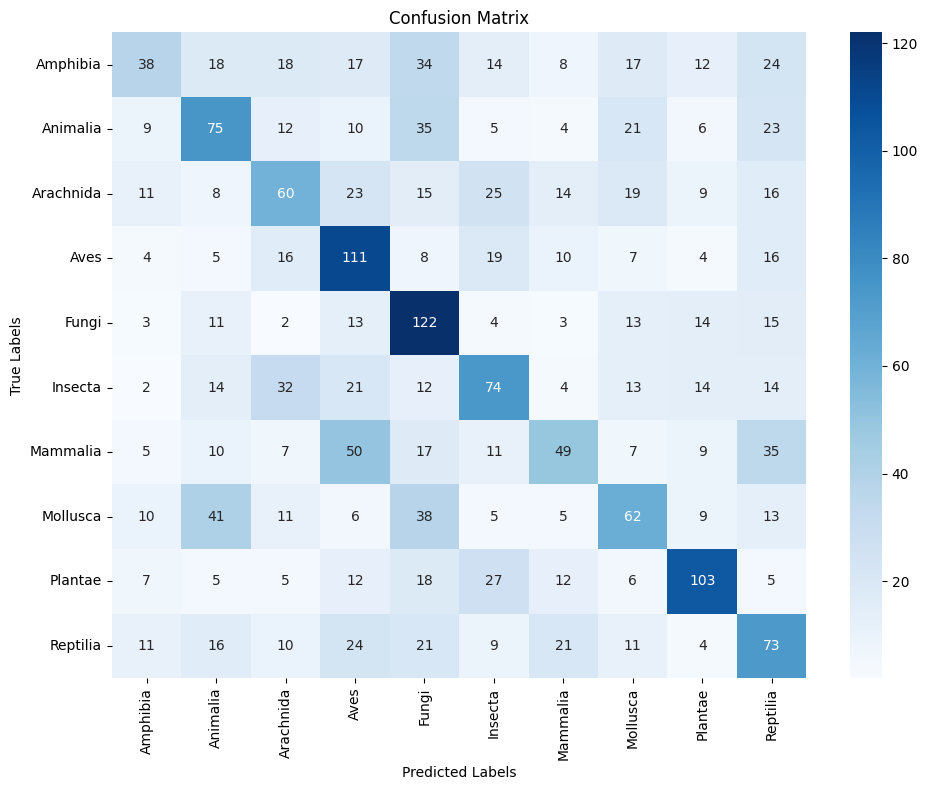

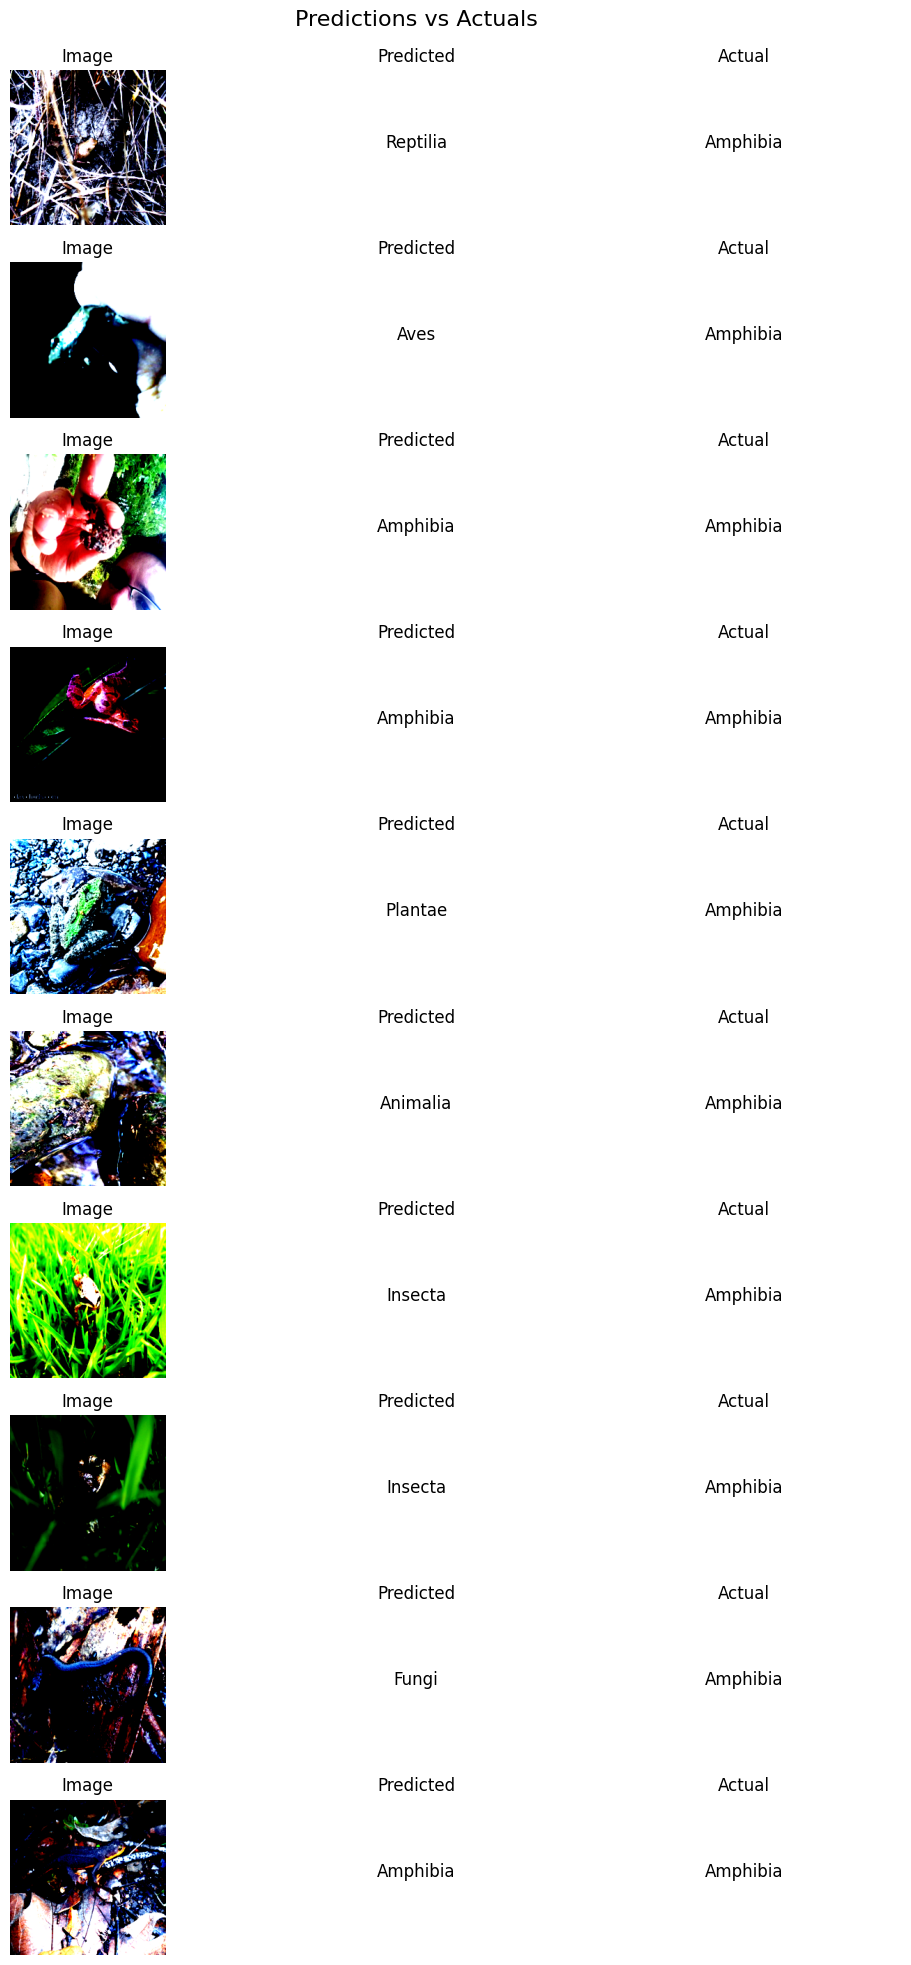

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
import os
import wandb
import seaborn as sns
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


activations = {
    'relu': nn.ReLU(),
    'tanh': nn.Tanh(),
    'sigmoid': nn.Sigmoid(),
    'leaky_relu': nn.LeakyReLU(),
    'mish':nn.Mish(),
    'gelu':nn.GELU(),
    'silu':nn.SiLU(),
    'relu6':nn.ReLU6()
}

optimizer_dict = {
    'adam': optim.Adam,
    'adamw': optim.AdamW,
    'sgd': optim.SGD
}

config = {
    'epochs': 20,
    'factor': 2,
    'stride': 1,
    'padding': 2,
    'num_classes': 10,
    'dense_neurons': 512,
    'optimizer': 'adam',
    'batch_size': 64,
    'filter_org': 'double',
    'filter_size': 1,
    'conv_filters': 64,
    'dropout_rate': 0.5,
    'learning_rate': 0.0001,
    'use_batchnorm': True,
    'conv_activation': 'gelu',
    'dense_activation': 'relu6',
    'max_pooling_size': 2,
    'use_augmentation': False,
    'dropout_organisation': 'after_relu',
    'kernel_sizes': [1, 1, 1, 1, 1],  
    'input_dimension': (3, 224, 224),  
    'image_size': (224, 224),
}


def generate_filters(base_m, strategy):
    if strategy == 'same':
        return [base_m] * 5
    elif strategy == 'double':
        return [base_m * (2 ** i) for i in range(5)]
    elif strategy == 'half':
        return [max(1, base_m // (2 ** i)) for i in range(5)]
    else:
        raise ValueError(f"Unknown strategy: {strategy}")
    
class TrainAndPredict:
    def __init__(self, model, device, class_names, optimizer=None, lr=0.001, weight_decay=0.0):
        self.model = model.to(device)
        self.device = device
        self.class_names = class_names
        self.criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
        self.optimizer = optimizer_dict[optimizer](self.model.parameters(), lr=lr, weight_decay=weight_decay)

    def train(self, train_loader, val_loader, epochs=10, save_path='best_model_cnn_final.pth'):
        best_val_acc = 0.0
        best_epoch = 0

        for epoch in range(epochs):
            self.model.train()
            total_loss = 0
            correct, total = 0, 0

            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

            train_loss = total_loss / len(train_loader)
            train_acc = 100 * correct / total
            val_acc = self.validate(val_loader)

            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")


            # Save best model bases on val accuracy but I Feel like Saving best model on high training accuracy makes it better
            # if val_acc > best_val_acc:
            #     best_val_acc = val_acc
            #     best_epoch = epoch + 1
            #     torch.save(self.model.state_dict(), save_path)

            #     artifact = wandb.Artifact('best-model', type='model')
            #     artifact.add_file(save_path)
                # wandb.log_artifact(artifact)

            # Log to Weights & Biases
            # wandb.log({
            #     'epoch': epoch + 1,
            #     'train_loss': train_loss,
            #     'train_acc': train_acc,
            #     'val_acc': val_acc
            # })
            if epoch == 19:
                torch.save(self.model.state_dict(), save_path)

        print(f"\nBest model saved from Epoch {best_epoch} with Val Acc: {best_val_acc:.2f}%")

    def validate(self, val_loader):
        self.model.eval()
        correct, total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        return 100 * correct / total

    def predict(self, image_tensor):
        self.model.eval()
        image_tensor = image_tensor.to(self.device).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            outputs = self.model(image_tensor)
            _, pred = torch.max(outputs, 1)
        
        return self.class_names[pred.item()]


class CNN(nn.Module):
    def __init__(self, config):
        super(CNN, self).__init__()

        in_channels = config['input_dimension'][0]
        base_m = config['conv_filters']
        strategy = config['filter_org']
        conv_filters = generate_filters(base_m, strategy)
        kernel_sizes = config['kernel_sizes']
        stride = config['stride']
        padding = config['padding']
        pool = config['max_pooling_size']
        dropout = config['dropout_rate']
        use_bn = config['use_batchnorm']
        dropout_org = config['dropout_organisation']

        conv_layers = []
        for i in range(5):
            out_channels = conv_filters[i]
            conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=kernel_sizes[i], stride=stride, padding=padding))
            if use_bn:
                conv_layers.append(nn.BatchNorm2d(out_channels))
            # if dropout_org == 'before_relu':
            #     conv_layers.append(nn.Dropout2d(dropout))
            conv_layers.append(activations[config['conv_activation']])
            # if dropout_org == 'after_relu':
            #     conv_layers.append(nn.Dropout2d(dropout))
            conv_layers.append(nn.MaxPool2d(kernel_size=pool))
            in_channels = out_channels

        self.conv = nn.Sequential(*conv_layers)

        
        with torch.no_grad():
            dummy_input = torch.zeros((1, *config['input_dimension']))
            dummy_output = self.conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Linear(flattened_size, config['dense_neurons']),
            activations[config['dense_activation']],
            nn.Dropout(dropout),
            nn.Linear(config['dense_neurons'], config['num_classes'])
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


def evaluate_on_test(model, test_loader, device, class_names=None):
    model.eval()
    correct, total = 0, 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = 100 * correct / total
    print(f"\nTest Accuracy: {acc:.2f}%")

    # Plot Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else range(cm.shape[0]),
                yticklabels=class_names if class_names else range(cm.shape[0]))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return acc

def show_predictions_grid(model, test_loader, device, class_names, num_images=10):
    model.eval()
    images_shown = 0
    rows = num_images
    fig, axs = plt.subplots(rows, 3, figsize=(10, rows * 2))
    fig.suptitle("Predictions vs Actuals", fontsize=16)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break

                image = images[i].cpu().numpy().transpose((1, 2, 0))
                image = np.clip(image, 0, 1)

                axs[images_shown, 0].imshow(image)
                axs[images_shown, 0].axis('off')
                axs[images_shown, 0].set_title("Image")

                axs[images_shown, 1].text(0.5, 0.5, class_names[preds[i].item()], fontsize=12, ha='center')
                axs[images_shown, 1].axis('off')
                axs[images_shown, 1].set_title("Predicted")

                axs[images_shown, 2].text(0.5, 0.5, class_names[labels[i].item()], fontsize=12, ha='center')
                axs[images_shown, 2].axis('off')
                axs[images_shown, 2].set_title("Actual")

                images_shown += 1

            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    

def main():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    
    model = CNN(config)
        
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])

    # Dataloaders
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(config['image_size'], scale=(0.5, 1.0)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
        transforms.RandomGrayscale(p=0.1),
        transforms.GaussianBlur(kernel_size=3),
        transforms.ToTensor(),
        normalize
    ]) if config['use_augmentation'] else transforms.Compose([
        transforms.Resize(config['image_size']),
        transforms.ToTensor(),
        normalize
    ])

    val_transform = transforms.Compose([
        transforms.Resize(config['image_size']),
        transforms.ToTensor(),
        normalize
    ])


    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    torch.cuda.set_device(device)
    train_dataset = datasets.ImageFolder('../train', transform=train_transform)
    val_dataset = datasets.ImageFolder('../val', transform=val_transform)
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True,num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=True,num_workers=4, pin_memory=True)

    trainer = TrainAndPredict(model, device, train_dataset.classes,optimizer=config['optimizer'],lr=config['learning_rate'])

    # Train and log
    trainer.train(train_loader, val_loader, epochs=config['epochs'])
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
    
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        normalize
    ])

    test_dataset = datasets.ImageFolder(root='../test', transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)

    
    model = CNN(config).to(device)
    model.load_state_dict(torch.load("best_model_cnn_final.pth", map_location=device))

    
    evaluate_on_test(model, test_loader, device,test_dataset.classes)
    
    show_predictions_grid(model, test_loader, device, test_dataset.classes, num_images=10)

if __name__ == "__main__":
    main()
